In [ ]:
from datetime import datetime
from meteostat import Stations

stations = Stations()
stations = stations.nearby(35.0844, 106.6504)
stations = stations.inventory('daily', datetime(2021, 1, 1))
station = stations.fetch()

station

In [ ]:
from meteostat import Stations
from meteostat import *
import datetime
start = datetime.datetime(2018, 1, 1)
end = datetime.datetime(2019, 1, 31, 23, 59)
data = ('85682' ,start, end)
data = data.fetch()
data

In [ ]:
from meteostat import Stations
def station_ids_nearby(lat,long, n):
    stations = Stations()
    stations = stations.nearby(lat, long)
    station = stations.fetch(n)
    Station_IDs = [iter for iter in station.index]
    return Station_IDs, station
station_ids_nearby(17.3850, 78.4867, 8)
station

In [58]:
from datetime import datetime
from meteostat import Hourly
import pandas as pd
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31, 23, 59)
data = Hourly('43125', start, end)
data = data.fetch()
date = '2018-02-15'
time = '12:00:00'
# data.to_csv('pa1.csv')
# print(type(data.first_valid_index()))
data.reset_index(True)

IndexError: Too many levels: Index has only 1 level, not 2

In [ ]:
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
import metpy
x = np.random.randint(10,100,50)
y = np.random.randint(2010,2015,50)
slope, intercept, r, p, std_err = sp.stats.linregress(x, y)

def myfunc(x):
  return slope * x + intercept

mymodel = list(map(myfunc, x))
plt.scatter(x, y)
plt.plot(x, mymodel)
plt.show(add = metpy.plots.add_metpy_logo(fig, x=10, y=25, zorder=100, size='small'))

In [ ]:
from datetime import datetime
import matplotlib.pyplot as plt
import scipy as sp
import numpy as np
from meteostat import Hourly
# Set time period
start = datetime(2018, 1, 1)
end = datetime(2018, 12, 31, 23, 59)
data = Hourly('43125' ,start, end)
data2 = Hourly('43133' ,start, end)
data = data.fetch()
data2 = data2.fetch()
stat = data.iloc[:,0].to_frame().reset_index()
neigh = data2.iloc[:,0].to_frame().reset_index()
stat.rename(columns = {'time':'date_time'},inplace = True)
neigh.rename(columns = {'time':'date_time'},inplace = True)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
 
x = np.linspace( -10 , 10 , 150 )
y = np.linspace( -10 , 10 , 150 )
 
a, b = np.meshgrid( x , y )
 
C = a ** 2 + b ** 2 - 80
 
figure, axes = plt.subplots()
 
axes.contour( a , b , C , [0] )
axes.set_aspect( 1 )
 
plt.title( 'Center-Radius form Circle' )
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import metpy.plots as mp
import metpy.units as units

df = pd.read_csv('station_data.csv')

temperature = df['temperature'].to_numpy() * units.degf
dew_point = df['dew_point'].to_numpy() * units.degf
wind_direction = df['wind_direction'].to_numpy() * units.degrees
wind_speed = df['wind_speed'].to_numpy() * units('m/s')
pressure = df['pressure'].to_numpy() * units.hPa
humidity = df['humidity'].to_numpy() / 100
precipitation = df['precipitation'].to_numpy() * units.mm

fig = plt.figure(figsize=(10, 10))
skew = mpplots.SkewT(fig)

mp.plotting_utils.add_station_plot(skew, pressure, temperature, dew_point=dew_point, 
                                         cloud_frac=None, cloud_type=None, 
                                         precip_amount=precipitation, precip_type=None, 
                                         flight_rules=None, metar_string=None)

u, v = mpplots.wind_components(wind_speed, wind_direction)
skew.ax.barb(0.5, 0.5, u.to('knots').magnitude, v.to('knots').magnitude, length=7)

skew.ax.set_xlabel('Temperature (C)')
skew.ax.set_ylabel('Pressure (hPa)')
skew.ax.set_xlim([-40, 40])
skew.ax.set_ylim([1000, 1000])

skew.ax.set_title(f'Station Model for {df.loc[0, "station_id"]} on {df.loc[0, "datetime"].date()}')

plt.show()

In [ ]:
import pandas as pd
import metpy
# Create some sample data
temperature = [20.1, 18.5, 17.2, 22.8, 21.3]
dew_point = [15.8, 14.3, 13.5, 18.9, 17.2]
pressure = [1002, 1005, 1008, 1003, 1001]
humidity = [0.72, 0.64, 0.68, 0.58, 0.61]
precipitation = [20,15,22,10,15]
visibility = [1.5,1.0,2.5,2.0,1.125]
wind_direction = [190, 140, 220, 54, 33]
wind_speed = [24, 11, 23, 12, 10]


# Create a dictionary with the data
data = {'temperature': temperature,
        'dew_point': dew_point,
        'pressure': pressure,
        'humidity': humidity,
        'wind_direction' : wind_direction,
        'wind_speed' : wind_speed,
        'precipitation' : precipitation
       }

# Convert the dictionary to a Pandas DataFrame
df = pd.DataFrame(data)
data
# Write the DataFrame to a CSV file
# df.to_csv('station_data.csv', index=False)
help(metpy.plots.StationPlotLayout)

In [ ]:
import matplotlib.pyplot as plt
import metpy.plots as mpplots
from metpy.units import units
from metpy.calc import dewpoint, wind_components


def plot_station_model(temp = None, dew= None, slp= None, wind_speed= None, wind_dir= None, cloud_coverage= None, station_id= None,
                       time= None, altimeter=None, current_weather=None):
#    
#     Plots a station model with all its parameters.

#     Args:
#     temp (float): Temperature in degrees Celsius.
#     dew (float): Dew point temperature in degrees Celsius.
#     slp (float): Sea level pressure in hPa.
#     wind_speed (float): Wind speed in knots.
#     wind_dir (float): Wind direction in degrees.
#     cloud_coverage (str): Cloud coverage code (e.g. 'CLR', 'FEW', 'SCT', 'BKN', 'OVC').
#     station_id (str): Station identifier.
#     time (str): Observation time in format 'YYYY-MM-DD HH:MM:SS'.
#     altimeter (float, optional): Altimeter setting in inches of mercury. Defaults to None.
#     current_weather (str, optional): Current weather code (e.g. 'RA', 'SN', 'TS', 'FG'). Defaults to None.
#     
    # Calculate derived parameters
    dew = dewpoint(temp * units.degC, dew * units.degC).to(units.degC)
    u_wind, v_wind = wind_components(wind_speed * units.knots, wind_dir * units.degrees)

    # Create figure and axis objects
    fig, ax = plt.subplots(figsize=(8, 8))

    # Plot station model
    mpplots.station.plot(ax, slp=slp * units.hPa, t=temp * units.degC, td=dew, wind=(u_wind, v_wind),
                          cloud_coverage=cloud_coverage, current_weather=current_weather)

    # Set axis limits
    ax.set_xlim(-120, 120)
    ax.set_ylim(-120, 120)

    # Set axis labels
    ax.set_xlabel('East-West distance (km)')
    ax.set_ylabel('North-South distance (km)')

    # Add station ID and time to plot
    ax.text(-115, 115, station_id, fontsize=14, fontweight='bold')
    ax.text(-115, 100, time, fontsize=12)

    # Add altimeter setting to plot if provided
    if altimeter is not None:
        ax.text(70, 115, f'Altimeter: {altimeter:.2f} inHg', fontsize=12)

    # Show plot
    plt.show()
plot_station_model(temp = 34,dew = 5,slp = 1010,wind_speed = 4,wind_dir = 110,cloud_coverage='FEW',station_id = '41832',time = '2021-10-13 08:05:12',current_weather = 'RA')

In [ ]:
import metpy.plots as plots
from metpy.units import units
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.set_xlim(-8,8)
ax.set_ylim(-8,8)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Station Model')

# Define some sample data
temperature = 15.6 * units.degC
dewpoint = 10.2 * units.degC
wind_speed = 10 * units.knots
wind_direction = 220 * units.degrees
pressure = 1010 * units.hPa
altimeter = 30.00 * units.inHg

station_circle = patches.Circle((0, 0), radius=5, linewidth=1, edgecolor='k', facecolor='w')
ax.add_patch(station_circle)

# Plot the station model
plots.StationPlot(ax, 0, 0, 'B', temperature=temperature, dewpoint=dewpoint,
                     wind_speed=wind_speed, wind_direction=wind_direction,
                     pressure=pressure, altimeter=altimeter)
irection
plt.grid()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from metpy.calc import reduce_point_density
from metpy.cbook import get_test_data
from metpy.io import metar
from metpy.plots import add_metpy_logo, current_weather, sky_cover, StationPlot

data = metar.parse_metar_file(get_test_data('metar_20190701_1200.txt', as_file_obj=False))
data = data.dropna(how='any', subset=['wind_direction', 'wind_speed'])
data

In [129]:
from metpy.io import *
import pandas as pd
import meteostat as mt
from datetime import datetime as dt
from dataclasses import dataclass
# a = [
# [1 , 	'Clear'],
# [2 , 	'Fair'],
# [3 , 	'Cloudy'],
# [4 , 	'Overcast'],
# [5 , 	'Fog'],
# [6 , 	'Freezing Fog'],
# [7 , 	'Light Rain'],
# [8 , 	'Rain'],
# [9 , 	'Heavy Rain'],
# [10 , 	'Freezing Rain'],
# [11 , 	'Heavy Freezing Rain'],
# [12 , 	'Sleet'],
# [13 , 	'Heavy Sleet'],
# [14 , 	'Light Snowfall'],
# [15 , 	'Snowfall'],
# [16 , 	'Heavy Snowfall'],
# [17 , 	'Rain Shower'],
# [18 , 	'Heavy Rain Shower'],
# [19 , 	'Sleet Shower'],
# [20 , 	'Heavy Sleet Shower'],
# [21 , 	'Snow Shower'],
# [22 , 	'Heavy Snow Shower'],
# [23 , 	'Lightning'],
# [24 , 	'Hail'],
# [25 , 	'Thunderstorm'],
# [26 , 	'Heavy Thunderstorm'],
# [27 , 	'Storm']]

@dataclass
class FetchData:
    station_id: str = None #type:ignore
    path_to_file: str = None #type:ignore
    '''FetchData Method takes Station_ID as String. ex:'12992'
    start is Start time for accumulation of observations in dt format. ex_Input: dt(YYYY, MM, DD, HH, MM, SS)
    end is End time range of the accumulation of data in dt format . dt(YYYY, MM, DD, HH, MM, SS) 
                                                                    -> (2022,  1,  2, 23, 59)
    period is observation frequency for the observations. parameter only accepts string, defaults to 'Hourly'
    Ex. 'Monthly','Daily'
    Example input:
    # a = FetchData('43128')
    # a = a.fetch_station_data(dt(2022, 1, 1), dt(2022, 1, 1, 23, 59), 'hourly')
    '''

    def fetch_station_data(self, start_time: dt, end_time: dt, obs_frequency='hourly'):
        if obs_frequency.lower() == 'hourly':
            if start_time > end_time:
                print('Enter Valid date time to fetch hourly data')
            else:
                data = mt.Hourly(self.station_id, start_time, end_time)
                data = data.fetch()
                parameters = list(data.columns.values)
                return data, parameters
        elif obs_frequency.lower() == 'daily':
            if start_time > end_time or start_time == end_time:
                print('Enter Valid days for fetching Daily data')
            else:
                data = mt.Daily(self.station_id, start_time, end_time)
                data = data.fetch()
                parameters = list(data.columns.values)
                return data, parameters
        elif obs_frequency.lower() == 'monthly':
            if start_time > end_time or start_time == end_time:
                print('Enter Valid months in Date,Time for fetching monthly data')
            else:
                data = mt.Monthly(self.station_id, start_time, end_time)
                data = data.fetch()
                parameters = list(data.columns.values)
                return data, parameters
        else:
            return print('The data period frequency is not valid')
    def custom_file_read(self):
        """This method takes the '.CSV' file or File_Path as input parameter and returns DF from
        # a= CustomData('pa1.csv')
        # a = a.custom_file_read()
        # print(a)
        """
        if self.path_to_file[-4:] == '.csv':
            data = pd.read_csv(self.path_to_file)
            parameters = list(data.columns.values)
            return data,parameters
        elif self.path_to_file[-4:] == '.txt':
            data = parse_metar_file(filename=self.path_to_file)
            parameters = list(data.columns.values)
            return data, parameters
        else:
            return 'Enter a valid .txt or .csv file or a file path'
    def get_input():
        timestamp_str = input("Enter a timestamp in the format 'YYYY-MM-DD HH:MM:SS': ")
        timestamp = dt.strptime(timestamp_str, '%Y-%m-%d %H:%M:%S')
        return timestamp    
# i = FetchData.get_input()
a = FetchData(path_to_file= r"C:\Users\Pavan Koundinya\Desktop\metar_vij.txt")
a,b = a.custom_file_read()
d = a.loc[a['date_time']==i]
# a['date_time']
d

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
VOHS,VOHS,17.23,78.43,1,2023-03-23 05:30:00,300.0,6.0,NaN,6000,NaN,...,30.0,14.0,29.94,0,0,0,NOSIG,1014.29,5.196152,-3.0


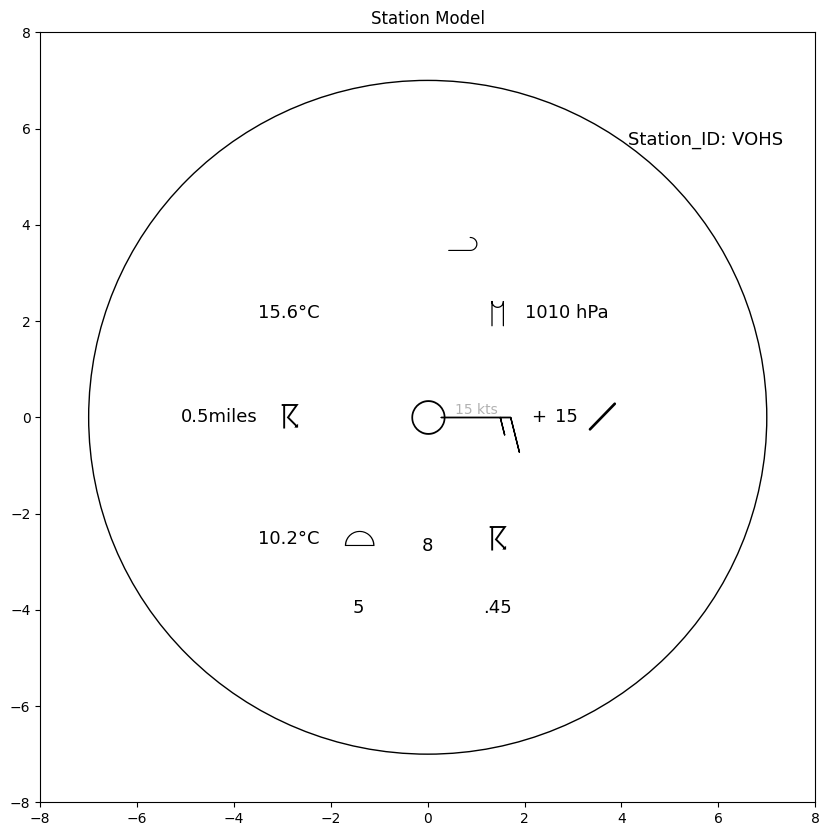

17


In [107]:
from metpy.plots import *
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.lines as lines
from metpy.units import units

fig, ax = plt.subplots(figsize=(10, 10))

ax.set_xlim(-8, 8)
ax.set_ylim(-8, 8)

ax.set_title('Station Model')

# Define some sample data
temperature = 15.6
dewpoint = 10.2
wind_speed = 15
wind_direction = 90
pressure = 1010
cloud_height = 5
high_cloud = ''
mid_cloud = ''
low_cloud = ''
sky_covered = ''
visibility_distance = 0.5
present_weather = ''
past_weather = ''
press_tend = ''
press_change = '+'
pressure_difference = 15
precipitation = '.45'
sky_cover_at_lowest_cloud = 8
Station_ID = 'VOHS'
# Draw the station model
sp = StationPlot(ax, 0, 0, fontsize=13, spacing=25)
station_circle = patches.Circle((0, 0), radius=7, lw=1, edgecolor='k', facecolor='w')
# ax.set_aspect()
ax.add_patch(station_circle)

# to plot temperature in the model
sp.plot_text((-4, 3), text=[str(temperature) + '°C'], fontsize=13)

# to plot dew_point temperature in the model
sp.plot_text((-4, -3.5), text=[str(dewpoint) + '°C'], fontsize=13)

# to plot visibility distance in the model
sp.plot_text((-6, 0), text=[str(visibility_distance) + 'miles'], fontsize=13)

# adding a station plot to insert special figures
# sp.plot_barb([np.radians(wind_direction)], [wind_speed], length = 12)
# sp.plot_parameter('

# to position windbarb in the center of the model
# u = -wind_speed * np.sin(np.radians(wind_direction))
# v = -wspd_mps * math.cos(np.radians(wind_direction))
sp.plot_barb(u=[-wind_speed * np.sin(np.radians(wind_direction))],
             v=[-wind_speed * np.cos(np.radians(wind_direction))], length=10)

# to add wind speed in knots at the end of the barb
ax.text(1 * np.sin(np.radians(wind_direction)), 1 * np.cos(np.radians(wind_direction)),
        str(wind_speed) + ' kts', ha='center', va='bottom', rotation = 0, fontsize=10, alpha=0.3)

#to add Station ID to the model
sp.plot_text((8, 8), text=['Station_ID: '+ str(Station_ID)], fontsize=13)

# to add pressure to the model
sp.plot_text((4, 3), text=[str(pressure) + ' hPa'], fontsize=13)

# to add pressure_change to the model
sp.plot_text((3.2, 0), text=[str(press_change)], fontsize=13)

# to add pressure_difference to the model
sp.plot_text((4, 0), text=[str(pressure_difference)], fontsize=13)

# to add sky_cover_of the lowest cloud to the model
sp.plot_text((0, -3.7), text=[str(sky_cover_at_lowest_cloud)], fontsize=13)

# to add height of the cloud base
sp.plot_text((-2, -5.5), text=[str(cloud_height)], fontsize=13)

# to add precipitation to the model
sp.plot_text((2, -5.5), text=[str(precipitation)], fontsize=13)

# to add Sky_cover symbol to the model
sp.plot_symbol((0, 0), codes=[0], symbol_mapper=sky_cover, fontsize=25)

# to add pressure_tendency symbol to the model
sp.plot_symbol((5, 0), codes=[2], symbol_mapper=pressure_tendency, va='center', ha='center', fontsize=25)

# to add low_clouds symbol to the model
sp.plot_symbol((-2, -3.5), codes=[1], symbol_mapper=low_clouds, va='center', ha='center', fontsize=25)

# to add mid_clouds symbol to the model
sp.plot_symbol((2, 3), codes=[8], symbol_mapper=mid_clouds, va='center', ha='center', fontsize=25)

# to add high_clouds symbol to the model
sp.plot_symbol((1, 5), codes=[1], symbol_mapper=high_clouds, va='center', ha='center', fontsize=25)

# to add current_weather symbol to the model
sp.plot_symbol((-4, 0), codes = [wx_code_map['TS']], symbol_mapper=current_weather, va='center', ha='center', fontsize=25)

# to add past_weather symbol to the model
sp.plot_symbol((2, -3.5), codes=[wx_code_map['TS']], symbol_mapper=current_weather, va='center', ha='center', fontsize=25)

# adding metpy logo at the corner
# al = add_metpy_logo(fig=fig, x=8, y=8, zorder=5, size='small')

# plt.grid()
plt.show()
print(wx_code_map['TS'])

In [87]:
import random
parameters = {
            'temperature': ('Temperature', 'TEMPERATURE', 'tmpt', 'air_temperature', 'temp', 'tmpf', 'tmpc'),
            'dew_point_temperature': ('Dew_Point_Temperature', 'DEW_POINT_TEMPERATURE', 'dwpt', 'dwpc',
                                      'dew_temp', 'dwpf'),
            'wind_speed': ('WIND_SPEED','wspd', 'sknt', 'Wind_Speed', ''),
            'wind_direction': ('WIND_DIRECTION', 'Wind_Direction', 'drct', 'wdir'),
            'cloud_height': ('skyl3','highest_cloud_level', 'high_cloud_level',
                             'medium_cloud_level', 'low_cloud_level'),
            'pressure': ('PRESSURE', 'pres', 'mslp', 'atmospheric_pressure', 'air_pressure_at_sea_level'),
            'high_cloud': ('high_cloud_type', 'skyc3', ),
            'mid_cloud': ('mid_cloud_type', 'skyc2'),
            'low_cloud': ('low_cloud_type', 'skyc1', ),
            'sky_cover': ('cloud_coverage', 'skyc1', ),
            'visibility_distance': ('visibility', 'vsby', ),
            'present_weather': ('coco', 'current_weather', 'wxcodes', 'current_wx1', ),
            'past_weather': None,
            'pressure_tendency': None,
            'pressure_change': None,
            'pressure_difference': None,
            'precipitation': ('p01i', 'prcp', 'PRECIPITATION', ),
            'sky_cover_at_lowest_cloud': ('low_cloud_level', 'skyl1')
            }
data = {
        'temperature': None,
        'dew_point_temperature': None,
        'wind_speed': None,
        'wind_direction': None,
        'cloud_height': None,
        'pressure': None,
        'high_cloud': None,
        'mid_cloud': None,
        'low_cloud': None,
        'sky_cover': None,
        'visibility_distance': None,
        'present_weather': None,
        'past_weather': None,
        'pressure_tendency': None,
        'pressure_change': None,
        'pressure_difference': None,
        'precipitation': None,
        'sky_cover_at_lowest_cloud': None
    }
parameters['past_weather']
b = ['station_id', 'latitude', 'longitude', 'elevation', 'date_time', 'wind_direction', 'wind_speed', 'wind_gust', 'visibility', 'current_wx1', 'current_wx2', 'current_wx3', 'low_cloud_type', 'low_cloud_level', 'medium_cloud_type', 'medium_cloud_level', 'high_cloud_type', 'high_cloud_level', 'highest_cloud_type', 'highest_cloud_level', 'cloud_coverage', 'air_temperature', 'dew_point_temperature', 'altimeter', 'current_wx1_symbol', 'current_wx2_symbol', 'current_wx3_symbol', 'remarks', 'air_pressure_at_sea_level', 'eastward_wind', 'northward_wind']
a = list(parameters.keys())
a1 = list(parameters.values())
# for i in range(len(b)):
#     if b[i] in a:
#         parameters[a.index(b[i])] = b[i]
#     else:
#         print (b[i])
# print(parameters)

18

In [131]:
print("This is my file to test Python's execution methods.")
print("The variable __name__ tells me which context this file is running in.")
print("The value of __name__ is:", repr(__name__))

This is my file to test Python's execution methods.
The variable __name__ tells me which context this file is running in.
The value of __name__ is: '__main__'
